# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [2]:
from swatmf_pkgs import swatmf_viz
import itertools

In [22]:
wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models"
sub_number = 240
start_date = '1/1/2020'
obd_nam = '240'
scn_df = swatmf_viz.all_strs(wd, sub_number, start_date, obd_nam, time_step='M')


Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenar

In [23]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
df

,filter,base_240
2003-01-31,1.0,342.90
2003-02-28,2.0,474.00
2003-03-31,3.0,499.30
2003-04-30,4.0,428.20
2003-05-31,5.0,416.50
...,...,...
2019-08-31,8.0,112.10
2019-09-30,9.0,88.16
2019-10-31,10.0,73.11
2019-11-30,11.0,102.60


In [24]:
base_df = df.drop('filter', axis=1)
# base_df = df.resample('M').mean()
base_df

,base_240
2003-01-31,342.90
2003-02-28,474.00
2003-03-31,499.30
2003-04-30,428.20
2003-05-31,416.50
...,...
2019-08-31,112.10
2019-09-30,88.16
2019-10-31,73.11
2019-11-30,102.60


In [25]:
scn_df = scn_df.iloc[:, :8]
scn_df

,base_ssp245-inm-cm5-0_sub_240,base_ssp245-miroc6_sub_240,base_ssp245-noresm2-lm_sub_240,base_ssp245-ukesm1-0-ll_sub_240,base_ssp585-inm-cm5-0_sub_240,base_ssp585-miroc6_sub_240,base_ssp585-noresm2-lm_sub_240,base_ssp585-ukesm1-0-ll_sub_240
2020-01-31,224.60,175.70,157.40,183.10,163.10,180.20,146.80,220.20
2020-02-29,356.80,309.10,312.30,358.10,243.60,395.90,332.20,338.40
2020-03-31,394.50,442.80,405.70,393.90,565.10,526.70,677.50,292.50
2020-04-30,415.60,398.10,391.80,313.10,489.10,314.30,382.80,390.70
2020-05-31,342.10,392.90,254.60,151.50,347.10,254.30,211.70,306.70
...,...,...,...,...,...,...,...,...
2050-08-31,106.60,96.39,108.90,82.24,117.50,84.60,91.79,96.28
2050-09-30,73.90,67.66,79.32,46.11,93.95,50.33,62.78,61.55
2050-10-31,46.36,76.94,60.81,33.58,87.18,27.59,51.89,27.78
2050-11-30,81.52,74.73,91.61,61.61,97.29,74.84,109.90,71.60


In [26]:
s245_min = scn_df.iloc[:, :4].min(axis = 1)
s245_max = scn_df.iloc[:, :4].max(axis = 1)
s585_min = scn_df.iloc[:, 4:].min(axis = 1)
s585_max = scn_df.iloc[:, 4:].max(axis = 1)


In [28]:
str_obd = pd.read_csv(
                    os.path.join(wd_base, 'streamflow.obd'),
                    sep=r'\s+', index_col=0, header=0,
                    parse_dates=True, delimiter="\t",
                    na_values=[-999, ""]
                    )
str_obd

,sub_225_dirico,sub_240_mohembo
date,,
2002-07-31,43.60,179.44
2002-08-31,31.79,152.58
2002-09-30,29.80,129.19
2002-10-31,49.47,106.57
2002-11-30,64.83,100.52
...,...,...
2020-02-29,NaN,366.05
2020-03-31,NaN,603.31
2020-04-30,NaN,719.03


In [29]:
nams = []
nses = []
rmses = []
pbiases = []
rsquareds = []
for i in range(len(scn_df.columns)):
    df =  pd.concat([scn_df.iloc[:, i], str_obd.iloc[:, 1]], axis=1)
    nse, rmse, pbias, rsquared = swatmf_viz.get_stats(df)

    nams.append(scn_df.columns[i])
    nses.append(nse[0])
    rmses.append(rmse[0])
    pbiases.append(pbias[0])
    rsquareds.append(rsquared)

In [30]:
stat_df = pd.DataFrame(
    np.column_stack([nams, nses, rmses, pbiases, rsquareds]),
    columns=['Scenario Name', 'NSE', 'RMSE', 'PBIAS', 'R-Squared'])
stat_df = stat_df.sort_values(by=['NSE'], ascending=False)
stat_df = stat_df.set_index('Scenario Name')
stat_df = stat_df.astype(float).round(3)
stat_df


,NSE,RMSE,PBIAS,R-Squared
Scenario Name,,,,
base_ssp585-inm-cm5-0_sub_240,0.513,135.346,25.472,0.851
base_ssp245-miroc6_sub_240,0.246,168.460,29.411,0.857
base_ssp245-inm-cm5-0_sub_240,0.167,177.041,28.246,0.710
base_ssp585-noresm2-lm_sub_240,0.153,178.519,24.080,0.536
base_ssp245-noresm2-lm_sub_240,0.031,191.036,35.792,0.783
base_ssp245-ukesm1-0-ll_sub_240,-0.315,222.477,37.388,0.417
base_ssp585-ukesm1-0-ll_sub_240,-0.252,217.085,36.497,0.513
base_ssp585-miroc6_sub_240,-0.080,201.655,28.979,0.365


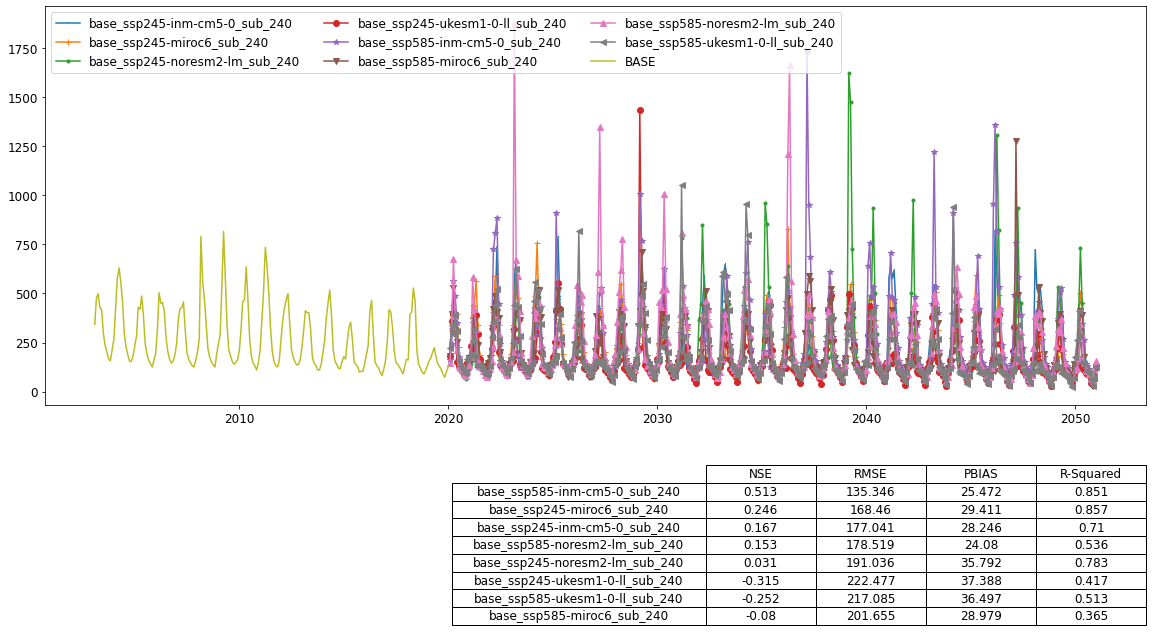

In [31]:
f, ax = plt.subplots(figsize=(16, 6))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(scn_df.columns)):
    ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])

ax.plot(base_df.index, base_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )

# ax.legend(scn_df.columns.tolist(), fontsize=12, ncol=4)

tb = plt.table(
        cellText=stat_df.values,
        colWidths = [0.1]*len(stat_df.columns),
        rowLabels=stat_df.index,
        colLabels=stat_df.columns,
        cellLoc = 'center', rowLoc = 'center',
        bbox = [0.6, -0.55, 0.4, 0.4])
tb.auto_set_font_size(False)
tb.set_fontsize(12)
tb.scale(1, 2)
plt.savefig(os.path.join(wd, 'okvg_scn_225.png'), dpi=300, bbox_inches="tight")
plt.show()

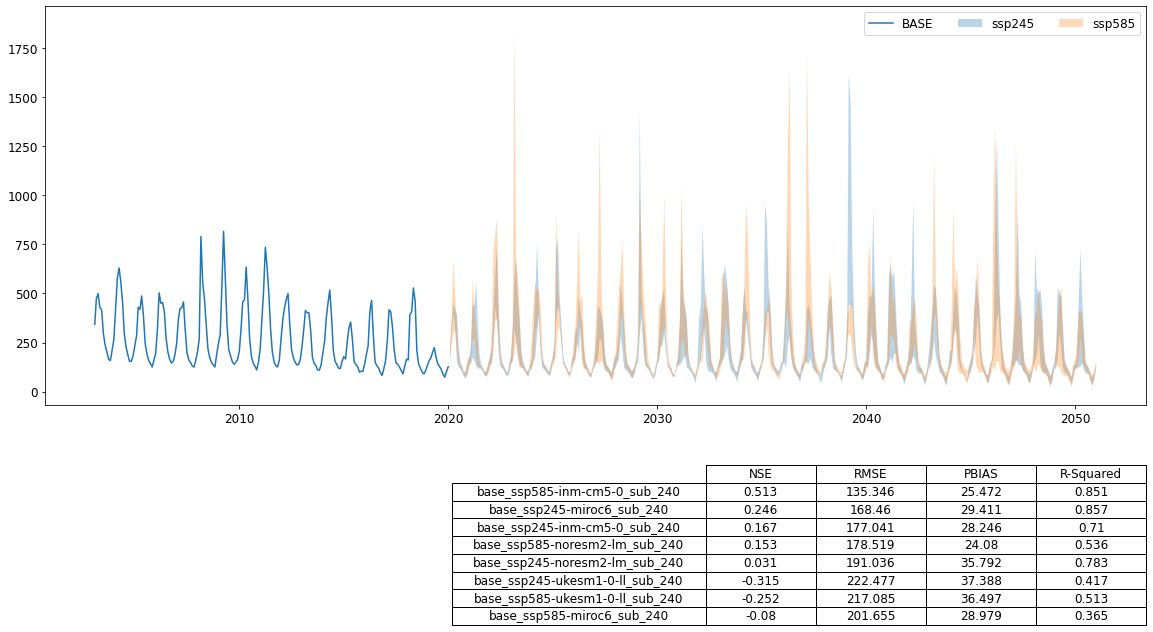

In [32]:
f, ax = plt.subplots(figsize=(16, 6))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(base_df.index, base_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )

# ax.legend(scn_df.columns.tolist(), fontsize=12, ncol=4)

tb = plt.table(
        cellText=stat_df.values,
        colWidths = [0.1]*len(stat_df.columns),
        rowLabels=stat_df.index,
        colLabels=stat_df.columns,
        cellLoc = 'center', rowLoc = 'center',
        bbox = [0.6, -0.55, 0.4, 0.4])
tb.auto_set_font_size(False)
tb.set_fontsize(12)
tb.scale(1, 2)
plt.savefig(os.path.join(wd, 'fokvg_scn_240.png'), dpi=300, bbox_inches="tight")
plt.show()

In [36]:
df =  pd.concat([base_df.iloc[:, 0], str_obd.iloc[:, 1]], axis=1)
df

,base_240,sub_240_mohembo
2002-07-31,NaN,179.44
2002-08-31,NaN,152.58
2002-09-30,NaN,129.19
2002-10-31,NaN,106.57
2002-11-30,NaN,100.52
...,...,...
2020-02-29,NaN,366.05
2020-03-31,NaN,603.31
2020-04-30,NaN,719.03
2020-05-31,NaN,NaN


In [37]:
nse, rmse, pbias, rsquared = swatmf_viz.get_stats(df)
stats = '{} - NSE: {:.2f} | RMSE: {:.2f} | PBIAS: {:.2f} | R-Squared: {:.2f}'.format(df.columns[0], nse[0], rmse[0], pbias[0], rsquared)


In [38]:
stats

'base_240 - NSE: 0.72 | RMSE: 95.51 | PBIAS: 8.47 | R-Squared: 0.74'

In [21]:
se[0][0]

NameError: name 'se' is not defined